# **OPEN-ARC**
---

### Project 3: Potato Plant Diseases Classification Model:
**Challenge:** Create an AI model, capable of classifying potato plant diseases, based on image/vision data. This can be further implemented in agriculture, to help farmers detect plant diseases earlier on, helping to yield healthier harvests. This project is part of a collaborative research project, OPEN-ARC, aiming to improve AI solutions for everyone.


### Terms and Use:
Learn more about the project's [LICENSE](https://github.com/Infinitode/OPEN-ARC/blob/main/LICENSE) and read our [CODE_OF_CONDUCT](https://github.com/Infinitode/OPEN-ARC/blob/main/CODE_OF_CONDUCT) before contributing to the project. You can contribute to this project from here: [https://github.com/Infinitode/OPEN-ARC/](https://github.com/Infinitode/OPEN-ARC/).

---

Please fill out this performance sheet to help others quickly see your model's performance **(optional)**:

### Performance Sheet:
| Contributor | Architecture Type | Platform | Base Model | Dataset | Accuracy | Link |
|-------------|-------------------|----------|------------|---------|----------|------|
| Infinitode  | CustomCNN  | Kaggle   | ✗  | 🌱 Potato Plant Diseases Data 🍂 | 95.1%    | [Notebook](https://github.com/Infinitode/OPEN-ARC/Project-3-PPDC/project-3-ppdc.ipynb) |
| Username  | Unknown  | Kaggle   | ✗/✔  | Weather Type Classification | Score    | [Notebook](https://github.com) |

---

### Model: Custom CNN:
This model uses Convolutional layers to function. It is a Convolutional Neural Network (CNN) architecture built in Tensorflow. We're using Tensorflow's built-in image loader, to help feed the images to the model, and apply some augmentation steps.

### Loading and preprocessing data
In the code below, we split our dataset into `train` and `validation` sets, which we'll use to both train the model and validate its performance in later code.

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up directories, these contain the classes already
base_dir = '/kaggle/input/potato-plant-diseases-data/PlantVillage/PlantVillage'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


It automatically detected 3 folders inside the base directory, which it now sees as 3 different classes, which are our target labels.

### Balancing the inbalances
We're assigning weights to each of the 3 classes, to ensure that the model does not develop a bias towards a given class.

In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_indices = train_generator.class_indices
labels = np.concatenate([train_generator.labels, val_generator.labels])
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weight_dict)

{0: 0.7173333333333334, 1: 0.7173333333333334, 2: 4.719298245614035}


### The CNN model
You can uncomment the first commented code, for the first testing model, which is a larger model (12 Million parameters) and work from there, or just run the cell and use the base model, which is our final model. It is a Sequential model, that takes color images with a `width` and `height` of 128, leaving the input to be `(128, 128, 3)`. We use a final `Dense` layer of 3, because we have 3 different classes.

In [40]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
    
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
    
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(3, activation='softmax')  # 3 classes: Early Blight, Late Blight, Healthy
# ])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,110,979 (19.50 MB)

 Trainable params: 5,110,019 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

Not a large model at all! It's pretty small, with only 5 Million parameters, which is really small for an image classification model, with some even going up to 128 Million parameters, which requires a lot more computational power. Which is not ideal for our use case.

### Time to train!
It is now finally time to train. You can adjust the epochs to see if you can get an optimal range for when your model performs at its best. Remember to monitor accuracy and loss values during training, as well as (most importantly), validation values.

In [46]:
history = model.fit(
    train_generator, 
    epochs=11, 
    validation_data=val_generator,
    class_weight=class_weight_dict
)

Epoch 1/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9446 - loss: 0.1837 - val_accuracy: 0.8860 - val_loss: 0.3804
Epoch 2/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9389 - loss: 0.2031 - val_accuracy: 0.9442 - val_loss: 0.1811
Epoch 3/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9534 - loss: 0.1559 - val_accuracy: 0.8558 - val_loss: 0.6504
Epoch 4/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9481 - loss: 0.1475 - val_accuracy: 0.9326 - val_loss: 0.3680
Epoch 5/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.9572 - loss: 0.1083 - val_accuracy: 0.8000 - val_loss: 1.0145
Epoch 6/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9514 - loss: 0.1148 - val_accuracy: 0.7698 - val_loss: 1.2029
Epoch 7/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9707 - loss: 0.0844 - val_accuracy: 0.8116 - val_loss: 0.9768
Epoch 8/11
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.9635 - loss: 0.0977 - val_accu

After 11 epochs, we get a validation accuracy of 95.12%, this is the final accuracy of the model, since it is how well it performs on unseen data.

### Testing time!
Run the code below to randomly pick 12 images, predict their outcome, and check your model's performance. The true label, is the label that the image actually represents, while predicted is what our model predicted the class to be. You can run it a bunch of times to see how well the model performs on the validation set.

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.9588 - loss: 0.1657
Validation Accuracy: 95.12%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


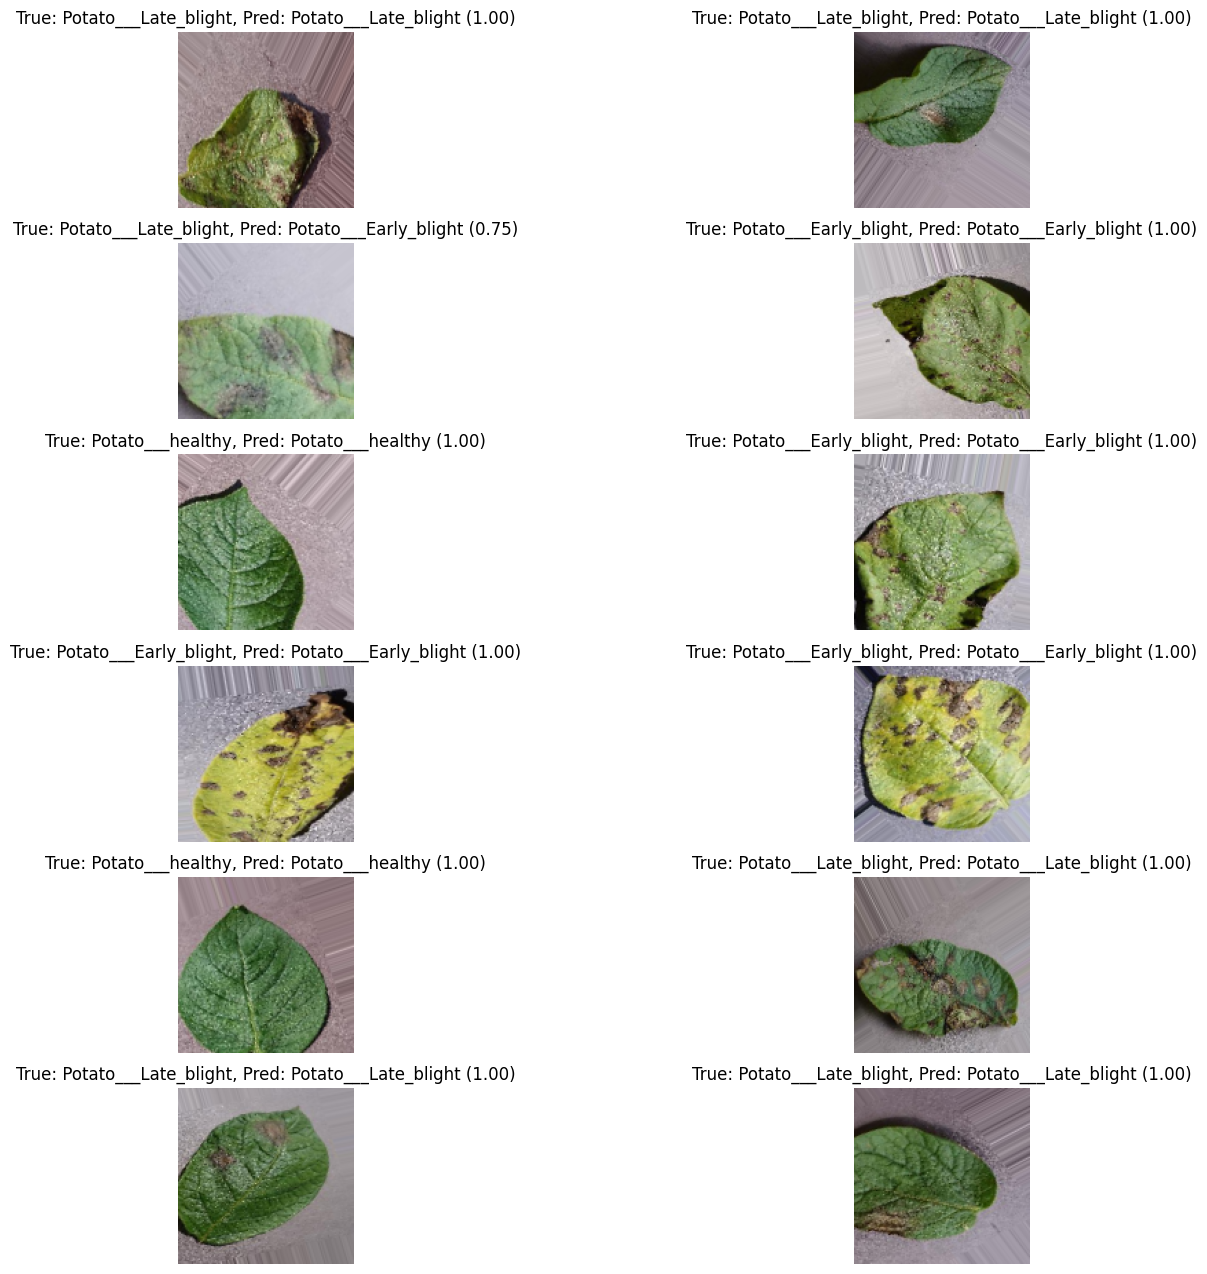

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Evaluate on validation data
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plotting predictions
def plot_predictions(model, generator):
    class_labels = list(generator.class_indices.keys())
    x_batch, y_batch = next(generator)

    plt.figure(figsize=(16, 16))
    for i in range(12):
        ax = plt.subplot(6, 2, i + 1)
        img = x_batch[i]
        true_label = np.argmax(y_batch[i])
        true_class = class_labels[true_label]
        
        img_array = np.expand_dims(img, axis=0)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class]
        
        plt.imshow(img)
        plt.title(f'True: {true_class}, Pred: {class_labels[predicted_class]} ({confidence:.2f})')
        plt.axis('off')
    plt.show()

plot_predictions(model, val_generator)

### The End:
This is the end of this project notebook, make sure to experiment and contribute to help improve the model and implementation. You can browse more of the open-source free projects on our GitHub repository: [https://github.com/Infinitode/OPEN-ARC](https://github.com/Infinitode/OPEN-ARC). If you like this project, make sure to star the repo and contribute your implementation, or help others in the community.

~ Infinitode